# Credit Card Fraud Detection

#The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

In [89]:
## import necessary libs

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import os

In [91]:
##loading the data
# print(os.listdir)
data=pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [92]:
print(data.shape)

(284807, 31)


In [93]:
print(data.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [94]:
# preprocessing the data, imbalance in the data

In [95]:
fraud=data[data['Class'] == 1]
valid=data[data['Class'] == 0]

In [96]:
outlierFraction=len(fraud)/float(len(valid))
print(outlierFraction)


0.0017304750013189597


In [97]:
#only 0.17% fraud transactions
print('fraud Cases:{}'.format(len(data[data['Class'] == 1])))
print('valid Cases:{}'.format(len(data[data['Class'] == 0])))

fraud Cases:492
valid Cases:284315


In [98]:
# amount details of fraudulent transactions

In [99]:
print('Fraud Amount:', fraud.Amount.describe())

Fraud Amount: count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [100]:
# amount details of normal transactions

In [101]:
print("Valid trx Amount:", valid.Amount.describe())

Valid trx Amount: count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [102]:
# as per above analysis, mean transaction of fraud is more than normal transactions

In [103]:
#Correlation Matrix

<function matplotlib.pyplot.show(*args, **kw)>

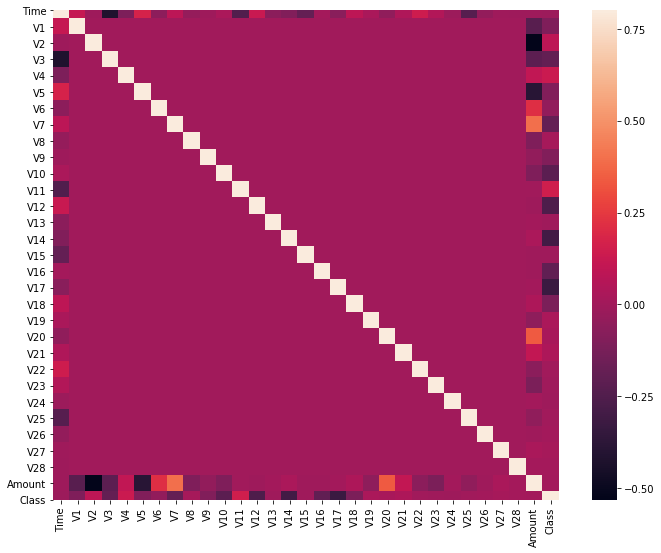

In [104]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9)) # setting size of our figure
sns.heatmap(corrmat, vmax= 0.8, square= True)
plt.show

In [105]:
# dividing the data into inputs (X) and output parameters (Y)

In [106]:
X=data.drop(['Class'], axis=1)
Y=data['Class']
print('shape of X:',X.shape, ' and shape of Y:',Y.shape)
xdata=X.values
ydata=Y.values

shape of X: (284807, 30)  and shape of Y: (284807,)


In [107]:
#split provided data into test and training data

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(xdata, ydata, test_size=0.2, random_state=10 )

In [110]:
#building a random forest classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc=RandomForestClassifier()
rfc.fit(x_train , y_train)

c:\users\1000267332\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
#predictions
yPred=rfc.predict(x_test)

In [114]:
#building metrix params

In [115]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [116]:
n_outliers=len(fraud)
n_errors=(yPred!=y_test).sum()
print("The model used is Random Forest classifier") 

The model used is Random Forest classifier


In [117]:
acc=accuracy_score(y_test, yPred)
print("Accuracy is {}:".format(acc))

Accuracy is 0.9996839998595555:


In [118]:
prec = precision_score(y_test, yPred) 
print("The precision is {} ".format(prec)) 

The precision is 0.9871794871794872 


In [119]:
rec = recall_score(y_test, yPred) 
print("The recall is {} ".format(rec)) 

The recall is 0.8191489361702128 


In [120]:
f1 = f1_score(y_test, yPred) 
print("The F1-Score is {} ".format(f1))

The F1-Score is 0.8953488372093025 


In [121]:
MCC = matthews_corrcoef(y_test, yPred) 
print("The Matthews correlation coefficient is{} ".format(MCC)) 


The Matthews correlation coefficient is0.8991022561812324 


In [122]:
#confusion matrix visualization

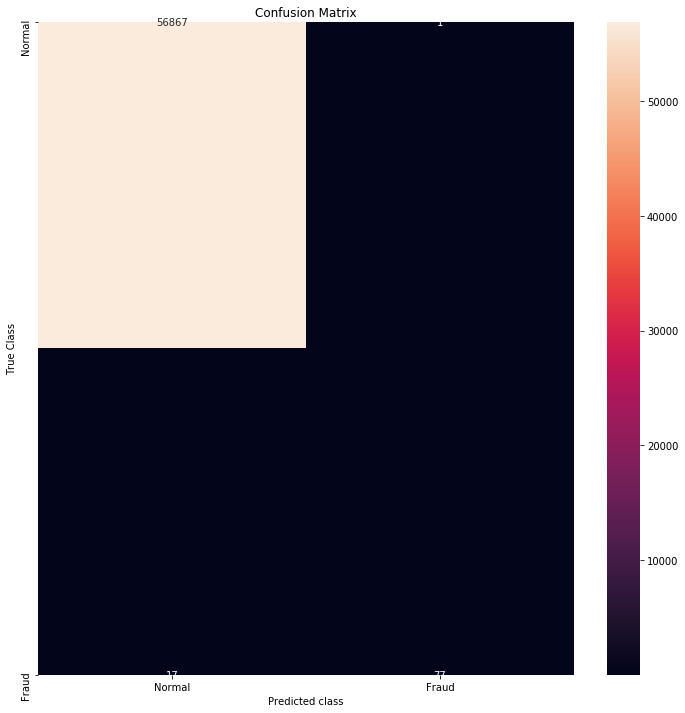

In [123]:
LABELS=['Normal', 'Fraud']
conf_matrix=confusion_matrix(y_test,yPred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels =LABELS, yticklabels=LABELS, annot=True,fmt="d") #fmt adds text to each cell
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel('Predicted class')
plt.show()